# ***OpenCV***

$ \ $

La biblioteca OpenCV contiene mecanismos para hacer detección de rostros en
imágenes. La técnica utilizada se basa en las `Haar cascades` (cascadas de Haar), que es un enfoque de aprendizaje automático. OpenCV viene con modelos diseñados para detectar rostros, ojos y sonrisas que usaremos. La siguientes es la página donde se encuentra la información detallada de `Haar cascades`.

$ \ $

**Entrenamiento de clasificador en cascada:** https://docs.opencv.org/3.4/dc/d88/tutorial_traincascade.html
 
$ \ $
 
Sin embargo, en esta parte solo usaremos los clasificadores actuales y veremos si podemos detectar las partes de una imagen que son interesantes.

$ \ $

In [ ]:
#(1) importamos el paquete cv de la librería OpenCV.
import cv2 as cv


#(2) exploramos un poco la clase CascadeClassifier en el módulo cv2.
help(cv.CascadeClassifier)



Help on class CascadeClassifier in module cv2:

class CascadeClassifier(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self, /)
 |      Return repr(self).
 |  
 |  detectMultiScale(...)
 |      detectMultiScale(image[, scaleFactor[, minNeighbors[, flags[, minSize[, maxSize]]]]]) -> objects
 |      .   @brief Detects objects of different sizes in the input image. The detected objects are returned as a list
 |      .       of rectangles.
 |      .   
 |      .       @param image Matrix of the type CV_8U containing an image where objects are detected.
 |      .       @param objects Vector of rectangles where each rectangle contains the detected object, the
 |      .       rectangles may be partially outside the original image.
 |      .       @param scaleFactor Parameter specifying how much the image size is reduced at each image scale.
 |      .       @param mi

In [ ]:
#(1) importamos el paquete cv de la librería OpenCV.
import cv2 as cv


#(2) cargamos los clasificadores en cascada que vamos a usar.
cara_cascada = cv.CascadeClassifier("/content/haarcascade_frontalface_default.xml")
ojo_cascada = cv.CascadeClassifier("/content/haarcascade_eye.xml")



In [ ]:
#(1) importamos el paquete cv de la librería OpenCV.
import cv2 as cv


#(2) exploramos el contenido de la función imread del paquete cv.
help(cv.imread)



Help on built-in function imread:

imread(...)
    imread(filename[, flags]) -> retval
    .   @brief Loads an image from a file.
    .   
    .   @anchor imread
    .   
    .   The function imread loads an image from the specified file and returns it. If the image cannot be
    .   read (because of missing file, improper permissions, unsupported or invalid format), the function
    .   returns an empty matrix ( Mat::data==NULL ).
    .   
    .   Currently, the following file formats are supported:
    .   
    .   -   Windows bitmaps - \*.bmp, \*.dib (always supported)
    .   -   JPEG files - \*.jpeg, \*.jpg, \*.jpe (see the *Note* section)
    .   -   JPEG 2000 files - \*.jp2 (see the *Note* section)
    .   -   Portable Network Graphics - \*.png (see the *Note* section)
    .   -   WebP - \*.webp (see the *Note* section)
    .   -   Portable image format - \*.pbm, \*.pgm, \*.ppm \*.pxm, \*.pnm (always supported)
    .   -   PFM files - \*.pfm (see the *Note* section)
    .   -   

$ \ $



La función `cv.imread` de la librería OpenCV carga una imagen del archivo especificado y la devuelve. 

$ \ $

In [ ]:
#(1) importamos el paquete cv de la librería OpenCV.
import cv2 as cv


#(2) exploramos la función cvtColor del paquete cv de OpenCV.
help(cv.cvtColor)



Help on built-in function cvtColor:

cvtColor(...)
    cvtColor(src, code[, dst[, dstCn]]) -> dst
    .   @brief Converts an image from one color space to another.
    .   
    .   The function converts an input image from one color space to another. In case of a transformation
    .   to-from RGB color space, the order of the channels should be specified explicitly (RGB or BGR). Note
    .   that the default color format in OpenCV is often referred to as RGB but it is actually BGR (the
    .   bytes are reversed). So the first byte in a standard (24-bit) color image will be an 8-bit Blue
    .   component, the second byte will be Green, and the third byte will be Red. The fourth, fifth, and
    .   sixth bytes would then be the second pixel (Blue, then Green, then Red), and so on.
    .   
    .   The conventional ranges for R, G, and B channel values are:
    .   -   0 to 255 for CV_8U images
    .   -   0 to 65535 for CV_16U images
    .   -   0 to 1 for CV_32F images
    .   
    .

In [ ]:
#(1) importamos el paquete cv de la librería OpenCV.
import cv2 as cv


#(2) investigamos un poco acerca del método descriptor (función) detectMultiScale de la clase CascadeClassifier, la cual se encuentra en la libreria OpenCV.
# este método detecta objetos de diferentes tamaños y los describe con rectángulos que se escriben de la forma (x,y,w,h)
# brutal-----DETECCIÓN DE ROSTROS.
help(cv.CascadeClassifier.detectMultiScale)



Help on method_descriptor:

detectMultiScale(...)
    detectMultiScale(image[, scaleFactor[, minNeighbors[, flags[, minSize[, maxSize]]]]]) -> objects
    .   @brief Detects objects of different sizes in the input image. The detected objects are returned as a list
    .       of rectangles.
    .   
    .       @param image Matrix of the type CV_8U containing an image where objects are detected.
    .       @param objects Vector of rectangles where each rectangle contains the detected object, the
    .       rectangles may be partially outside the original image.
    .       @param scaleFactor Parameter specifying how much the image size is reduced at each image scale.
    .       @param minNeighbors Parameter specifying how many neighbors each candidate rectangle should have
    .       to retain it.
    .       @param flags Parameter with the same meaning for an old cascade as in the function
    .       cvHaarDetectObjects. It is not used for a new cascade.
    .       @param minSiz

In [ ]:
#(1) importamos el paquete cv de la librería OpenCV.
import cv2 as cv


#(2) cargamos la ruta "floyd.jpg" de la imagen matricial y le damos el nombre de imagen.
imagen = cv.imread("floyd.jpg")


#(3) convertimos la imagen a escala de grises (de manera matricial).
gris = cv.cvtColor(imagen, cv.COLOR_BGR2GRAY)


#(4) usamos la función detectMultiScale(). Esta función devuelve una lista de objetos como rectángulos. 
caras = cara_cascada.detectMultiScale(gris)
display(caras)
print(caras)



array([[158,  75, 176, 176]], dtype=int32)

[[158  75 176 176]]


In [ ]:
#(1) importamos el módulo array.
import array as arr


#(2) exploramos un poco el contenido de el módulo array.
help(arr)



Help on built-in module array:

NAME
    array

DESCRIPTION
    This module defines an object type which can efficiently represent
    an array of basic values: characters, integers, floating point
    numbers.  Arrays are sequence types and behave very much like lists,
    except that the type of objects stored in them is constrained.

CLASSES
    builtins.object
        array
    
    ArrayType = class array(builtins.object)
     |  array(typecode [, initializer]) -> array
     |  
     |  Return a new array whose items are restricted by typecode, and
     |  initialized from the optional initializer value, which must be a list,
     |  string or iterable over elements of the appropriate type.
     |  
     |  Arrays represent basic values and behave very much like lists, except
     |  the type of objects stored in them is constrained. The type is specified
     |  at object creation time by using a type code, which is a single character.
     |  The following type codes are defined

In [ ]:
#(1) importamos el módulo array.
import array as arr


#(2) exploramos el contenido de la función array.tolist del módulo arr.
# esta función convierte una matriz en una lista con los mismos coeficientes de la matriz.
help(arr.array.tolist)



Help on method_descriptor:

tolist(self, /)
    Convert array to an ordinary list with the same items.



In [ ]:
#(1) importamos la librería de imagenes PIL.
import PIL


#(2) importamos el módulo Image de la librería PIL.
from PIL import Image


#(3) exploramos la función fromarray del módulo Image.
help(Image.fromarray)



Help on function fromarray in module PIL.Image:

fromarray(obj, mode=None)
    Creates an image memory from an object exporting the array interface
    (using the buffer protocol).
    
    If **obj** is not contiguous, then the tobytes method is called
    and :py:func:`~PIL.Image.frombuffer` is used.
    
    If you have an image in NumPy::
    
      from PIL import Image
      import numpy as np
      im = Image.open('hopper.jpg')
      a = np.asarray(im)
    
    Then this can be used to convert it to a Pillow image::
    
      im = Image.fromarray(a)
    
    :param obj: Object with array interface
    :param mode: Mode to use (will be determined from type if None)
      See: :ref:`concept-modes`.
    :returns: An image object.
    
    .. versionadded:: 1.1.6



In [ ]:
#(1) importamos la librería de imagenes PIL.
import PIL


#(2) importamos el módulo Image de la librería PIL.
from PIL import Image


#(3) importamos el paquete cv de la librería OpenCV.
import cv2 as cv


#(4) recordamos algunas cosas definidas anteriormente
imagen = cv.imread("floyd.jpg")
gris = cv.cvtColor(imagen, cv.COLOR_BGR2GRAY)


#(5) usaramos la función detectMultiScale() para obtener una lista de objetos como rectángulos en la imagen matricial gris, y le damos el nombre de caras.
caras = cara_cascada.detectMultiScale(gris)


#(6) mostramos en pantalla el resultado de (5).
print(caras)
print(type(caras))



[[158  75 176 176]]
<class 'numpy.ndarray'>


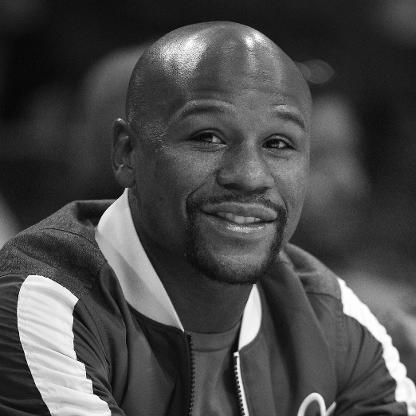

In [ ]:
#(1) importamos la librería de imagenes PIL.
import PIL


#(2) importamos el módulo Image de la librería PIL.
from PIL import Image


#(3) importamos el módulo ImageDraw de la librería de imagenes PIL.
from PIL import ImageDraw


#(4) importamos el paquete cv de la librería OpenCV.
import cv2 as cv


#(5) usamos la función fromarray del módulo Image para describir la imagen que representa la matriz gris.
imagen_matricial=Image.fromarray(gris, mode="L")


#(6) mostramos la imagen descrita con la función Image.fromarray 
display(imagen_matricial)



In [ ]:
#(7) permitimos realizar dibujos sobre la imagen_matricial.
dibujo_permitido=ImageDraw.Draw(imagen_matricial)


#(8) recordamos que  caras = cara_cascada.detectMultiScale(gris) y que la función tolist del módulo array toma una matriz y la convierte en una lista con los mismos coeficientes.
lista=caras.tolist()
print(lista)



[[158, 75, 176, 176]]


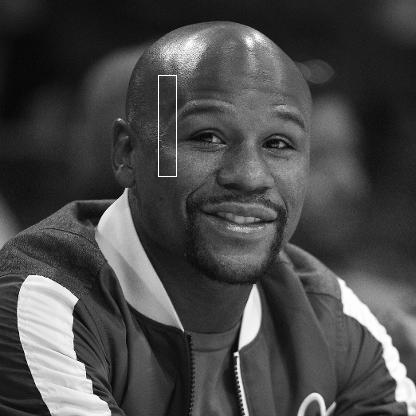

In [ ]:
#(9) tomamos el único elemento de la lista y le damos el nombre de rectángulo.
rectangulo=lista[0]


#(10) dibujamos un rectángulo sobre imagen_matricial.
# recordar que dibujo_permitido=ImageDraw.Draw(imagen_matricial).
(dibujo_permitido).rectangle(rectangulo, outline="white")


#(11) mostramos la imagen_matricial después de dibujar el rectángulo sobre ella
display(imagen_matricial)



$ \ $

Depronto se estarán preguntando 

$ \ $

¿Por qué no reconoció bien la imagen el módulo cv.CascadeClassifier.detectMultiScale?

$ \ $

La respuesta a esta pregunta es que hay diferentes maneras de describir un rectángulo, y esto depende de la libreria que estemos usando. En este caso el módulo  cv.CascadeClassifier.detectMultiScale de OpenCV nos arroja rectángulos que reconocen objetos en una imagen, y estos rectángulos se describen de la forma

 $$(x.y,w,h)$$

donde $(x,y)$ representa las coordenadas de un punto, w representa el ancho del rectángulo (w=width) y h representa la altura (h=height); y los rectángulos descritos con la función ImageDraw.Draw de PIL se describen como $(x_1,y_1,x_2,y_2)$.

$ \ $


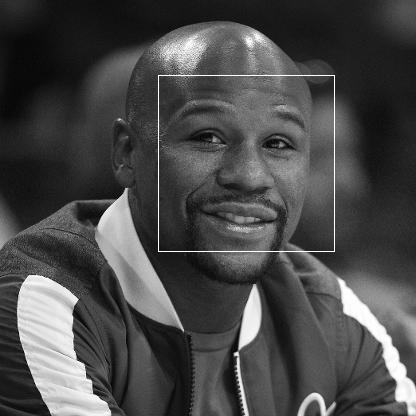

In [ ]:
#(1) importamos la librería de imagenes PIL.
import PIL


#(2) importamos el módulo Image de la librería PIL.
from PIL import Image


#(3) importamos el módulo ImageDraw de la librería de imagenes PIL.
from PIL import ImageDraw


#(4) importamos el paquete cv de la librería OpenCV.
import cv2 as cv


#(5) usamos la función Image.fromarray para describir la imagen que representa la matriz gris que describimos anteriormente.
imagen_matricial=Image.fromarray(gris, mode="L")


#(6) permitimos realizar dibujos sobre la imagen_matricial.
dibujo_permitido=ImageDraw.Draw(imagen_matricial)


#(7) describimos las coordenadas (x,y,w,h) del rectángulos obtenidos previamente.
x=rectangulo[0]
y=rectangulo[1]
w=rectangulo[2]
h=rectangulo[3]

#(8) realizamos un dibujo de un rectángulo en imagen_matricial con el rectángulo obtenido en (2) apropiadamente en PIL.
dibujo_permitido.rectangle((x,y,x+w,y+h), outline="white")


#(9) mostramos la imagen con el dibujo del rectángulo hecho previamente.
display(imagen_matricial)



$ \ $

Vemos que la detección de rostros funciona bastante bien en esta imagen. Tenga en cuenta que no hay detección de cabeza, ya que el archivo haarcascades que usamos está buscando ojos y boca.

$ \ $

In [ ]:
#(1) importamos la librería de imagenes PIL.
import PIL


#(2) importamos el módulo Image de la librería PIL.
from PIL import Image


#(3) importamos el paquete cv de la librería OpenCV.
import cv2 as cv


#(4) veamos la imagen "msi_recruitment.gif". Primero cargamos la imagen y la llamamos michigan
michigan_1 = cv.imread("msi_recruitment.gif")


#(5) intentamos mostrar michigan_1 con la función display y obtenemos un error debido a que estamos usando las librerias PIL y OpenCV, y al parecer no son compatibles.
#display(Image.fromarray(michigan_1))



$ \ $

Intentamos mostrar la imagen con la función display y obtenemos un error debido a que estamos usando las librerias PIL y OpenCV, y al parecer no son absolutamente compatibles. Sin embargo, ese no es precisamente el problema. El principal problema es que OpenCV no puede trabajar con imagenes de tipo `gif`. Veamos que pasa al cambiar el formato de la imagen.

$ \ $

Recordar que la función convert del módulo Image de PIL tiene la función `convert` y esta se describe de la siguiente manera:

$ \ $

***`convert`***(self, mode=None, matrix=None, dither=None, palette=0, colors=256)
Returns a converted copy of this image. For the "P" mode, this
method translates pixels through the palette.  If mode is
omitted, a mode is chosen so that all information in the image
and the palette can be represented without a palette.

In [ ]:
#(1) importamos la librería de imagenes PIL.
import PIL


#(2) importamos el módulo Image de la librería PIL.
from PIL import Image


#(3) importamos el paquete cv de la librería OpenCV.
import cv2 as cv


#(4) cargamos la ruta "msi_recruitment.gif" de imagen y le damos el nombre de michigan_pil.
michigan_pil=Image.open("msi_recruitment.gif")


#(5) construimos una copia de michigan_pil a escala de grises y le damos el nombre de copia_gris.
copia_gris=(michigan_pil).convert("L")


#(6) guardamos la copia_gris en formato png con el nombre de ruta  "msi_recruitment.png". 
(copia_gris).save("msi_recruitment.png")



$ \ $ 

-----

Intentemos identificar los rostros de la imagen con ruta "msi_recruitment.png".

$ \ $

In [ ]:
#(1) importamos la librería de imagenes PIL.
import PIL


#(2) importamos el módulo Image de la librería PIL.
from PIL import Image


#(3) importamos el módulo ImageDraw de la librería de imagenes PIL.
from PIL import ImageDraw


#(4) importamos el paquete cv de la librería OpenCV.
import cv2 as cv


#(5) cargamos la ruta "msi_recruitment.png" de la imagen matricial y le damos el nombre de michigan_2.
michigan_2=cv.imread("msi_recruitment.png")


#(6) detectamos objetos con la función detectMultiScale de OpenCV. 
rostros = cara_cascada.detectMultiScale(michigan_2,1.1) 


#(7) mostramos en pantalla el resultado de (6).
print(rostros)



[[287 169  41  41]
 [187 195  60  60]
 [ 73 229  53  53]
 [452 242  42  42]
 [372 252  46  46]
 [709 308  51  51]
 [346 344  28  28]
 [ 67 291  70  70]]


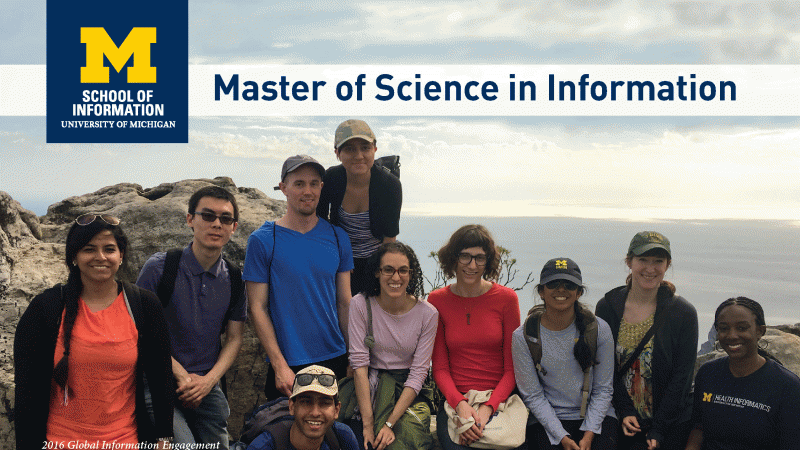

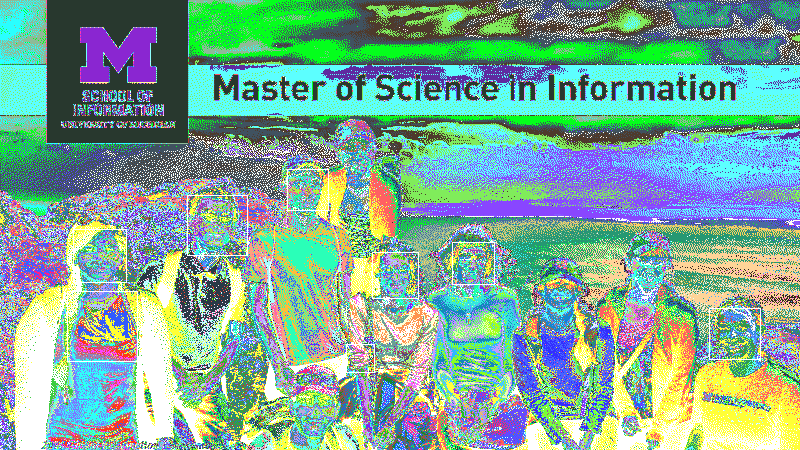

In [ ]:
#(8) cargamos la ruta "msi_recruitment.gif" de la imagen matricial.
michigan_1=Image.open("msi_recruitment.gif")
display(michigan_1)


#(9) permitimos realizar dibujos sobre la imagen michigan_1. 
dibujo_michigan=ImageDraw.Draw(michigan_1)


#(10) arreglamos el problema de descripción de rectángulos entre OpenCV y PIL.
for (x,y,w,h) in rostros:
  dibujo_michigan.rectangle((x,y,x+w,y+h), outline="white")


#(11) mostramos la imagen después de realizar el dibujo de los rectángulos
display(michigan_1)



$ \ $

------

hemos logrado detectar un montón de rostros en esa imagen, pero también  nos faltado cuatro caras por detectar. En el mundo del aprendizaje automático (maching learning) tenemos las siguientes nociones:


*  Un `falso negativo` es cuando el algoritmo de maching learning no interpretó una cara en el análisis de detección de rostros de una imagen.

* Un `falsos positivos` es algo que el algoritmo de maching learning interpretó como cara en el análisis de detección de rostros de una imagen, pero no lo era.

* Un `verdadero positivo` es cuando el algoritmo de maching learning detecta una cara en el análisis de detección de rostros de una imagen.

* Un `verdadero negativo` es el conjunto de los rectángulos interpretados por el algoritmo de maching learning, que nos indican que en el correspondiente rectángulo no hay caras.
 
$ \ $

In [ ]:
# Definimos la función mostrar_caras. Esta función tiene unicamente el parámetro "rostros" y tiene como salida la imagen de michigan_1 con los rostros detectados.
def mostrar_caras(rostros):
    #(1) cargamos la ruta "msi_recruitment.gif" de la imagen y le damos formato "RGB", le damos el nombre de michigan_1.
    michigan_1=Image.open("msi_recruitment.gif")

    #(2) creamos una copia de michigan_1 en formato RGB.
    imagen_rgb=(michigan_1).convert("RGB")


    #(2) cargamos la imagen en formato png y usamos la función detectMultiScale sobre la imagen para detectar rostros por medio de rectángulos.
    # este es el objetivo de la función, describir la lista de rectángulos que describen los rostros obtenidos con la función detectMultiScale. 
    # michigan_2=cv.imread("msi_recruitment.png")
    # rostros = cara_cascada.detectMultiScale(michigan_2) 


    #(3) permitimos realizar dibujos sobre la imagen llamada michigan_1.
    dibujo_michigan=ImageDraw.Draw(michigan_1)


    #(4) realizamos los dibujos de los rostros sobre la imagen de michigan_1.
    for (x,y,w,h) in rostros:
        dibujo_michigan.rectangle((x,y,x+w,y+h), outline="white")
        
 
    #(5) mostramos la imagen de michigan_1 con los rostros de las personas identificados por medio de un rectángulo
    display(michigan_1)



$ \ $

Lo siguiente que vamos a hacer es  intentar binarizar esta imagen. Resulta que OpenCV tiene incorporado una función binarización llamada threshold (umbral).

$ \ $

In [ ]:
#(1) importamos el paquete cv de la librería OpenCV.
import cv2 as cv


#(2) exploramos un poco la información de la función threshold (umbral) de OpenCV.
help(cv.threshold)



Help on built-in function threshold:

threshold(...)
    threshold(src, thresh, maxval, type[, dst]) -> retval, dst
    .   @brief Applies a fixed-level threshold to each array element.
    .   
    .   The function applies fixed-level thresholding to a multiple-channel array. The function is typically
    .   used to get a bi-level (binary) image out of a grayscale image ( #compare could be also used for
    .   this purpose) or for removing a noise, that is, filtering out pixels with too small or too large
    .   values. There are several types of thresholding supported by the function. They are determined by
    .   type parameter.
    .   
    .   Also, the special values #THRESH_OTSU or #THRESH_TRIANGLE may be combined with one of the
    .   above values. In these cases, the function determines the optimal threshold value using the Otsu's
    .   or Triangle algorithm and uses it instead of the specified thresh.
    .   
    .   @note Currently, the Otsu's and Triangle methods a

función = threshold(src, thresh, maxval, type[, dst])


*   src = una matriz que representa una imagen.


*   thresh = valor umbral.


*   maxval =  el valor máximo a usar con #THRESH_BINARY y #THRESH_BINARY_INV umbralización (ni puta idea).


*   type = tipo de umbralización(ver #ThresholdTypes).


*   SALIDA = el valor de umbral calculado si se utilizan los métodos de Otsu o Triangle.




In [ ]:
#(1) importamos la librería de imagenes PIL.
import PIL


#(2) importamos el módulo Image de la librería PIL.
from PIL import Image


#(3) importamos el módulo ImageDraw de la librería de imagenes PIL.
from PIL import ImageDraw


#(4) importamos el paquete cv de la librería OpenCV.
import cv2 as cv


#(5) cargamos la ruta "msi_recruitment.png" de la imagen, y le damos el nombre de michigan.
michigan=cv.imread("msi_recruitment.png")


#(6) binarizamos la imagen usando la función threshold de OpenCV.
binarizar_michigan=cv.threshold(michigan, 120, 255, cv.THRESH_BINARY)


#(7) miramos cual es el resultado de (6) usando la función print.
print(binarizar_michigan)



(120.0, array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   

In [ ]:
#(1) importamos el paquete cv de la librería OpenCV.
import cv2 as cv


#(2) exploramos un poco el contenido del método detectMultiScale de la clase CascadeClassifier.
help(cv.CascadeClassifier.detectMultiScale)



Help on method_descriptor:

detectMultiScale(...)
    detectMultiScale(image[, scaleFactor[, minNeighbors[, flags[, minSize[, maxSize]]]]]) -> objects
    .   @brief Detects objects of different sizes in the input image. The detected objects are returned as a list
    .       of rectangles.
    .   
    .       @param image Matrix of the type CV_8U containing an image where objects are detected.
    .       @param objects Vector of rectangles where each rectangle contains the detected object, the
    .       rectangles may be partially outside the original image.
    .       @param scaleFactor Parameter specifying how much the image size is reduced at each image scale.
    .       @param minNeighbors Parameter specifying how many neighbors each candidate rectangle should have
    .       to retain it.
    .       @param flags Parameter with the same meaning for an old cascade as in the function
    .       cvHaarDetectObjects. It is not used for a new cascade.
    .       @param minSiz

$ \ $

-------

la función `detectMultiScale` de ***OpenCV*** también tiene algunos parámetros adicionales que son bastante útiles tales como:


*  imagen = esta imagen es representada por una matriz de tipo CV_8U.

*  factor de escala = es un número que especifica cuánto se reduce el tamaño de la imagen.

*  minNeighbors (minVecinos) = es un número que especifica cuántos vecinos debe tener cada rectángulo candidato para conservarlo.

*  flags (banderas) =  este parámetro tiene el mismo significado para una  vieja cascada  como en la función `cvHaarDetectObjects`. Este parámetro no es usado para una nueva cascada.

*  minSize (minTamaño) =  el tamaño mínimo de un objeto. Objetos más pequeños que este son ignorados naturalmente.

*  maxSize (maxTaño) =  el tamaño máximo de un objeto.Objetos más grandes son ignorados. Si `maxSize == minSize`, entonces el modelo es evaluado sobre una sola escala.


*  SALIDA = detecta objetos de diferentes tamaños en la imagen que se dejó en el primer parámetro de la función. Los objetos detectados son devueltos como una lista de rectángulos.
    



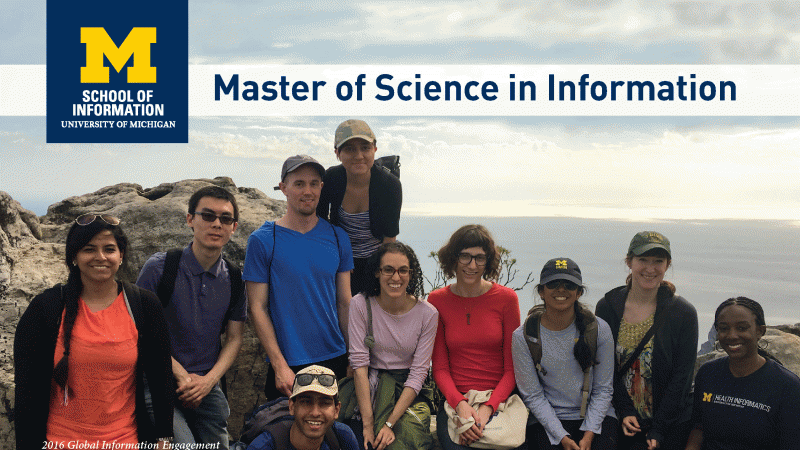

----------------------------------------------------------------------------------------------------------------------------------------------------------------------


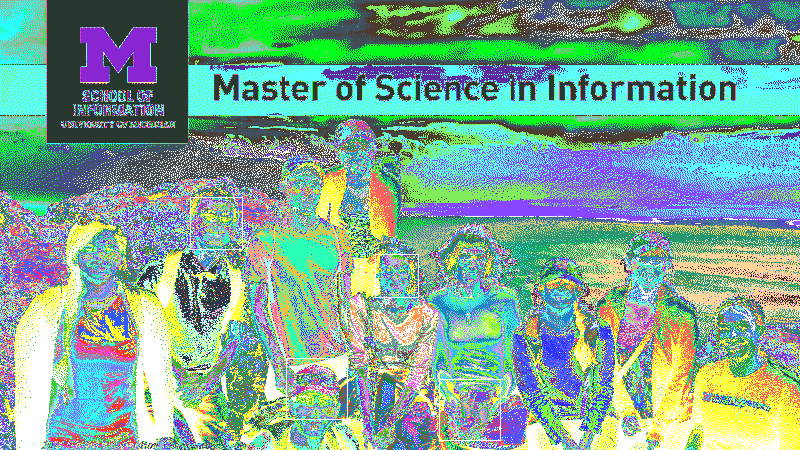

----------------------------------------------------------------------------------------------------------------------------------------------------------------------


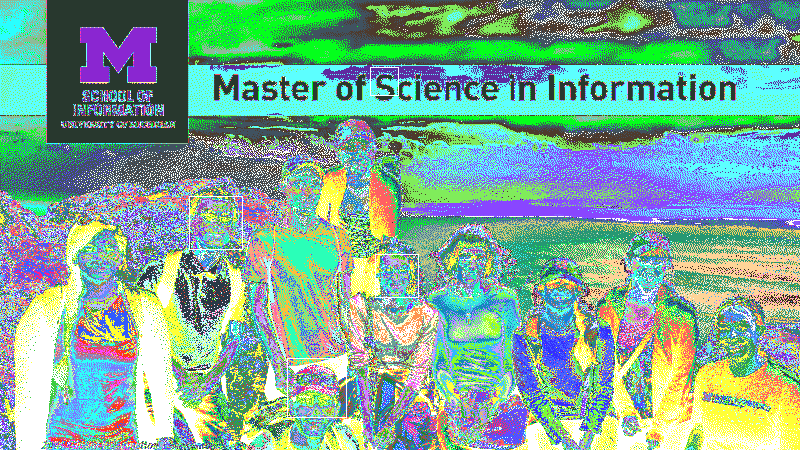

----------------------------------------------------------------------------------------------------------------------------------------------------------------------


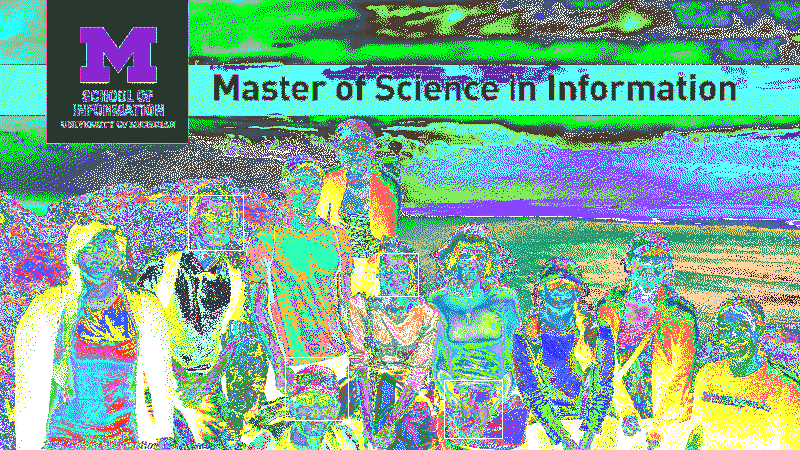

----------------------------------------------------------------------------------------------------------------------------------------------------------------------


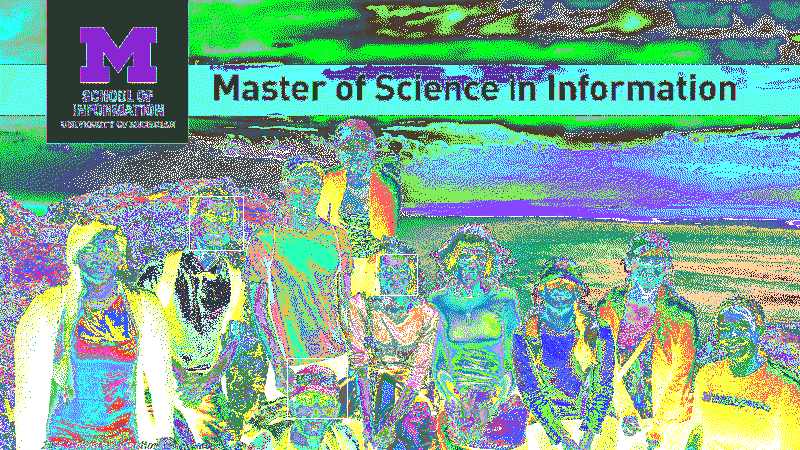

----------------------------------------------------------------------------------------------------------------------------------------------------------------------


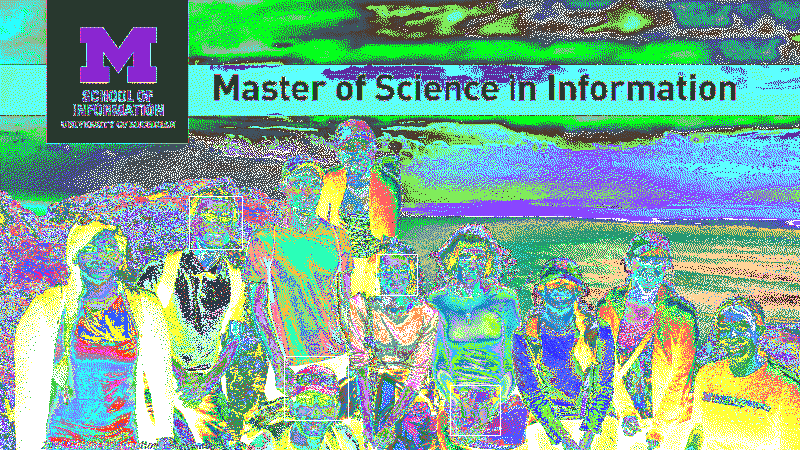

In [45]:
#(1) describimos la segunda componente en la función de reconocimiento de imagenes
caritas = cara_cascada.detectMultiScale(binarizar_michigan[1], 1.3, 5)
caritas_1 = cara_cascada.detectMultiScale(binarizar_michigan[1],1.038)
caritas_2 = cara_cascada.detectMultiScale(binarizar_michigan[1],1.03)
caritas_3 = cara_cascada.detectMultiScale(binarizar_michigan[1],1.04)
caritas_4 = cara_cascada.detectMultiScale(binarizar_michigan[1],1.05)
caritas_5 = cara_cascada.detectMultiScale(binarizar_michigan[1],1.06)


#(2) mostramos la imagen resultante al detectar los rostros con caritas. Es claro que deberia de ser la imagen original, ya que introducimos None
mostrar_caras(caritas)
print("----------------------------------------------------------------------------------------------------------------------------------------------------------------------")
mostrar_caras(caritas_1)
print("----------------------------------------------------------------------------------------------------------------------------------------------------------------------")
mostrar_caras(caritas_2)
print("----------------------------------------------------------------------------------------------------------------------------------------------------------------------")
mostrar_caras(caritas_3)
print("----------------------------------------------------------------------------------------------------------------------------------------------------------------------")
mostrar_caras(caritas_4)
print("----------------------------------------------------------------------------------------------------------------------------------------------------------------------")
mostrar_caras(caritas_5)




In [ ]:
!pip install pytest-timeit


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pytest-timeit: filename=pytest_timeit-0.3.0-py2.py3-none-any.whl size=5482 sha256=e2bd681a03ca5367a143254c5233bf59cec4649dfcbe3e19e5d4e1dfddfbd024
  Stored in directory: /root/.cache/pip/wheels/71/ec/66/061da851710c0cee01db248fcd94fb47b475f166fe820cdd5e
Successfully built pytest-timeit


In [ ]:
michigan_1=Image.open("a-0.png")